In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv('data/modelling_data.csv')
data.head()

,Unnamed: 0,period,start_date,end_date,revenue_index,total_spend_index,gross_orders_index,weekly_active_users_index,quarter,order_number,spend_per_user,prev_spend_per_user,prev_order_volume,prev_weekly_active_orders_index,prev_total_spend_index
0,0,2018Q1,2018-01-01,2018-02-28,100.000000,91.829498,110.810811,199.114172,2018Q1,455381458,0.461190,NaN,NaN,NaN,NaN
1,1,2018Q2,2018-03-01,2018-06-30,253.521127,355.545853,338.473768,462.304148,2018Q2,922108174,0.769073,0.461190,4.553815e+08,199.114172,91.829498
2,2,2018Q3,2018-07-01,2018-08-31,139.788732,833.816717,829.888712,1195.017386,2018Q3,890192139,0.697744,0.769073,9.221082e+08,462.304148,355.545853
3,3,2018Q4,2018-09-01,2018-12-31,306.161972,1396.528405,1508.426073,1811.129600,2018Q4,1515523453,0.771081,0.697744,8.901921e+08,1195.017386,833.816717
4,4,2019Q1,2019-01-01,2019-02-28,117.693662,1227.264316,1342.607313,2250.209135,2019Q1,1081879820,0.545400,0.771081,1.515523e+09,1811.129600,1396.528405


In [3]:
data.drop(index=data.index[0], axis=0, inplace=True)

# Visualize the data

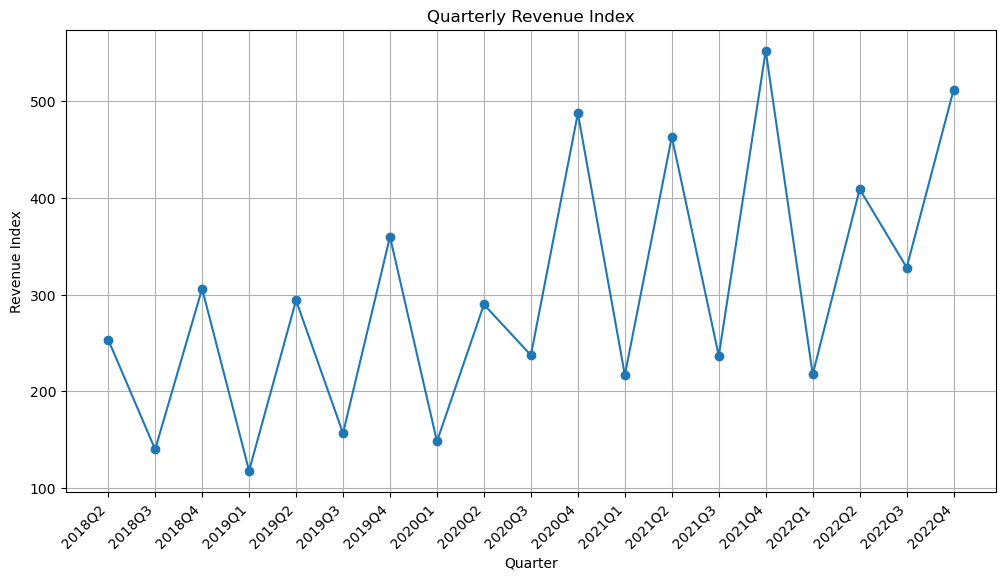

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data.period, data.revenue_index, marker='o', linestyle='-')
plt.title('Quarterly Revenue Index')
plt.xlabel('Quarter')
plt.ylabel('Revenue Index')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

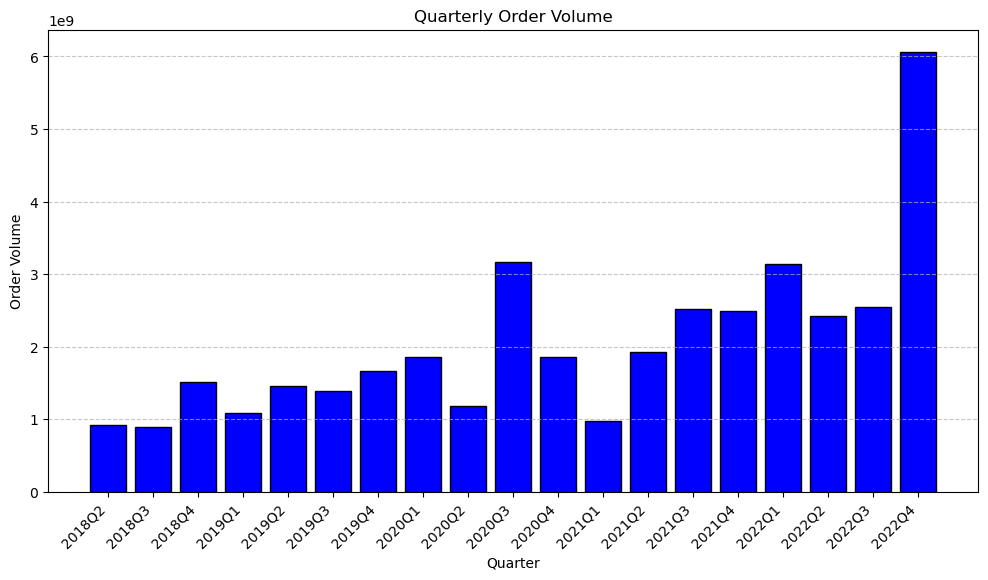

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(data.period, data.order_number, color='blue', edgecolor='black')

plt.title('Quarterly Order Volume')
plt.xlabel('Quarter')
plt.ylabel('Order Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

# Feature Selection
- use a correlation matrix for feature selection. There is many important things to keep in my mind when choosing features for linear regression models.
- features with a strong correlation to the target variable (positive or negative) are likely more useful for prediction.
- need to be careful of multicollinearity (high correlation between the independent variables)
    - potentially look at using PCA to reduce the dimensionality of your dataset.

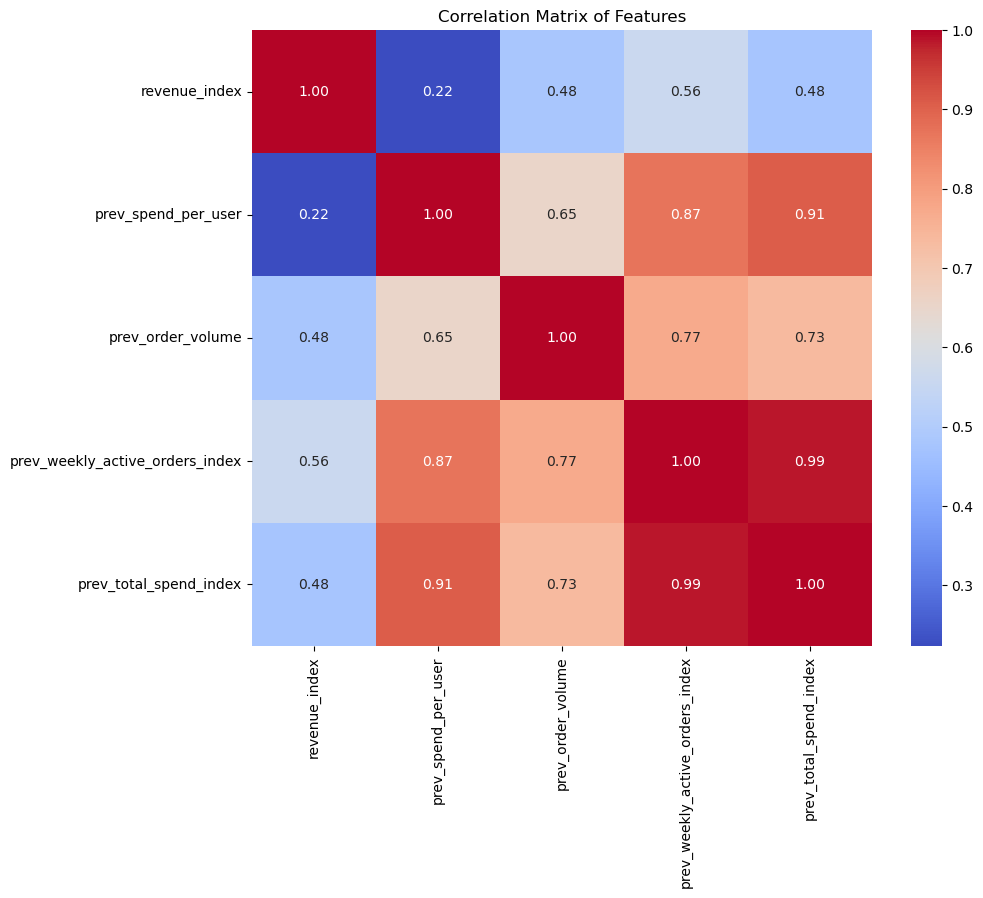

In [5]:
# Calculate the correlation matrix
df = data[['revenue_index', 'prev_spend_per_user', 'prev_order_volume', 'prev_weekly_active_orders_index', 'prev_total_spend_index']]
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

The correlation matrix above shows issues with multicollinearity. From the feature space I will remove 'prev_total_spend_index' and 'prev_spend_per_user'

In [6]:
X = data[['prev_weekly_active_orders_index', 'prev_order_volume', 'period']]
y = data[['revenue_index', 'period']]

In [7]:
X_train = X[X['period']!= '2022Q4'].drop(columns=['period'])
X_test = X[X['period']== '2022Q4'].drop(columns=['period'])
y_train = y[y['period']!= '2022Q4'].drop(columns=['period'])
y_test = y[y['period']== '2022Q4'].drop(columns=['period'])

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Its important to note that we can not get an R2 score in the test set as we are only testing on one quarter.

In [9]:
# 5. Make predictions
y_pred = model.predict(X_test)

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Calculate the in-sample R-squared
train_r_squared = r2_score(y_train, train_predictions)
print(f'In-sample R-squared: {train_r_squared:.4f}')

# Calculate the in-sample Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
print(f'In-sample Mean Squared Error: {train_mse:.2f}')

In-sample R-squared: 0.2513
In-sample Mean Squared Error: 11090.14


In [10]:
# 5. Make predictions
y_pred = model.predict(X_test)

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Calculate the in-sample R-squared
train_r_squared = r2_score(y_train, train_predictions)
print(f'In-sample R-squared: {train_r_squared:.4f}')

# Calculate the in-sample Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
print(f'In-sample Mean Squared Error: {train_mse:.2f}')

# Get the model coefficients
coefficients = model.coef_
print("Model Coefficients:")
print(f"  Coefficients: {coefficients}")
   

In-sample R-squared: 0.2513
In-sample Mean Squared Error: 11090.14
Model Coefficients:
  Coefficients: [[6.43875842e-03 2.29206188e-08]]


# Use OLS to model the data. The output from this can be used to check model fit, etc.
- keep it simple with statsmodels

In [ ]:
# Ensure X has an intercept for statsmodels
X_train_sm = sm.add_constant(X_train)  # Adds an intercept column
X_test_sm = sm.add_constant(X_test, has_constant='add')    # Adds intercept for test set

# Fit OLS Regression Model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print Model Summary
print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:          revenue_index   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.518
Date:                Sat, 29 Mar 2025   Prob (F-statistic):              0.114
Time:                        07:50:38   Log-Likelihood:                -109.37
No. Observations:                  18   AIC:                             224.7
Df Residuals:                      15   BIC:                             227.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/andrewbarwise/miniconda3/envs/odp_screening/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


'\n# ---- Step 4: Make Predictions ----\ny_train_pred = results.predict(X_train_sm)\ny_test_pred = results.predict(X_test_sm)\n\n# ---- Step 5: Residual Analysis ----\ntrain_residuals = y_train - y_train_pred\ntest_residuals = y_test - y_test_pred\n\n# ---- Step 6: Plot Histogram & KDE for Residuals ----\nplt.figure(figsize=(10, 5))\nsns.histplot(test_residuals.dropna(), bins=20, kde=True, color="blue", edgecolor="black")\n\n# Add a vertical line at zero\nplt.axvline(0, color=\'red\', linestyle=\'--\', linewidth=2, label="Zero Residual Line")\n\n# Labels and title\nplt.title("Residual Distribution (Histogram & KDE)", fontsize=14)\nplt.xlabel("Residuals (y_test - y_pred)", fontsize=12)\nplt.ylabel("Frequency", fontsize=12)\nplt.legend()\nplt.show()'

We can see from the model summary that this has bad predictive qualities. 
- The r-squared value indicates the proportion of variance in the dependent variable variable explained by the independent variables. The values for this and the adjusted r-squared are poor. 
- The value for Prob (F-Statistic) shows the statistical significance of the overall regression model. We are looking for a small p-value (<0.05) to indicate the model is statistically significant. 
- The value for skew is positive which means we have a right skewed distribution (we want a value close to zero). Deviations away from zero indicate departures from a normal distribution of the residuals.
- If we were using this as a baseline model and looking to further improve we would use the AIC and BIC values as a way of measuring the relative quality of a model for a given set of data. Lower AIC and BIC scores indicate better fitting models.

# Where would I go from here:
- firstly look at improving the data. Can we find more features or can we perform feature engineering to produce more relevant features.
- look at other models such as ensemble methods, autoregressive models